In [ ]:
from submission import flatten_list, char_count

In [2]:
# Then you need to design a large-scale experiment by yourself, i.e., increase the scale of the inputs. For example, you can prepare some very large lists that contain > 10^7 elements after flatting. Gradually increase the input scale (from 10^3, 10^4, 10^5, …, 10^7) and see how the time increase with your algorithm. Write a small report for this.

import time

def measure_time(func, *args, **kwargs):
    start_time = time.time() 
    result = func(*args, **kwargs)
    end_time = time.time()
    return end_time - start_time, result

In [3]:
# make up data for 10^3 to 10^7
import random
import string

# generate an random number with length 7
def get_random_number(max):
    return random.randint(1, max)

def generate_random_string(length):
    return ''.join(random.choice(string.ascii_letters + string.digits) for _ in range(length))

def generate_large_list(size):
    output = []
    tmp_size = size * 2
    while tmp_size > 0:
        length = get_random_number(size // 100)
        output.append([get_random_number(10**8) for _ in range(length)])
        tmp_size -= length

    return output


In [4]:
def run_experiment(func, generate_input, sizes):
    times = []
    for size in sizes:
        input_data = generate_input(size)
        execution_time, output = measure_time(func, input_data)
        times.append(execution_time)
        print(f"Size: {size}, Output Length: {len(output)}, Time: {execution_time:.6f} seconds")
    return times

Running flatten_list experiment...
Size: 1000, Output Length: 2004, Time: 0.000039 seconds
Size: 10000, Output Length: 20035, Time: 0.000161 seconds
Size: 100000, Output Length: 200485, Time: 0.002258 seconds
Size: 1000000, Output Length: 2003289, Time: 0.028088 seconds
Size: 10000000, Output Length: 20000051, Time: 0.189548 seconds
Size: 100000000, Output Length: 200164218, Time: 1.673609 seconds

Running char_count experiment...
Size: 1000, Output Length: 62, Time: 0.000073 seconds
Size: 10000, Output Length: 62, Time: 0.000464 seconds
Size: 100000, Output Length: 62, Time: 0.004502 seconds
Size: 1000000, Output Length: 62, Time: 0.044792 seconds
Size: 10000000, Output Length: 62, Time: 0.450406 seconds
Size: 100000000, Output Length: 62, Time: 4.592997 seconds


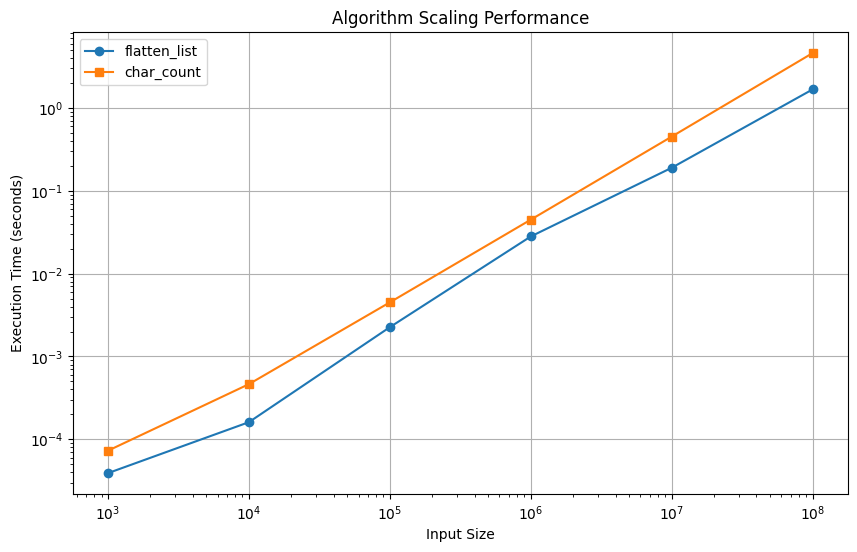

In [5]:
import matplotlib.pyplot as plt

# Experiment settings
sizes = [10**3, 10**4, 10**5, 10**6, 10**7, 10**8]

# Run experiments
print("Running flatten_list experiment...")
flatten_times = run_experiment(flatten_list, generate_large_list, sizes)

print("\nRunning char_count experiment...")
char_count_times = run_experiment(char_count, generate_random_string, sizes)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, flatten_times, marker='o', label='flatten_list')
plt.plot(sizes, char_count_times, marker='s', label='char_count')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Algorithm Scaling Performance')
plt.legend()
plt.grid(True)
plt.show()

## Report for the scaling basic functions
1. O(n): Extend operation takes time proportional to the size of the list being added, which depends on the size of the sublist. Each time a sublist is encountered, all its elements are appended to flattened, which can take time proportional to the number of elements in the sublist. Append operation is an O(1) operation because we’re adding a single element to the end of the list.
2. O(n): Counting characters in a string takes time proportional to the length of the string. The set operation is O(1) because it creates a new set from the characters in the string. The count operation is O(1) because it counts the occurrences of each character in the set. Loop through the string is O(n).

In [6]:
def new_flatten_list(nested_list: list):
    flattened = [item for sublist in nested_list for item in sublist]
    return flattened

def new_char_count(s: str):
    dict = {}
    for alphabet in s:
        if alphabet in dict:
            dict[alphabet] += 1
        else:
            dict[alphabet] = 1
    return dict

Running flatten_list experiment...
Size: 1000, Output Length: 2000, Time: 0.000077 seconds
Size: 10000, Output Length: 20012, Time: 0.000327 seconds
Size: 100000, Output Length: 200162, Time: 0.001920 seconds
Size: 1000000, Output Length: 2003837, Time: 0.019779 seconds
Size: 10000000, Output Length: 20054596, Time: 0.212034 seconds
Size: 100000000, Output Length: 200379757, Time: 2.791173 seconds

Running char_count experiment...
Size: 1000, Output Length: 62, Time: 0.000079 seconds
Size: 10000, Output Length: 62, Time: 0.000663 seconds
Size: 100000, Output Length: 62, Time: 0.006901 seconds
Size: 1000000, Output Length: 62, Time: 0.071373 seconds
Size: 10000000, Output Length: 62, Time: 0.703058 seconds
Size: 100000000, Output Length: 62, Time: 7.196039 seconds


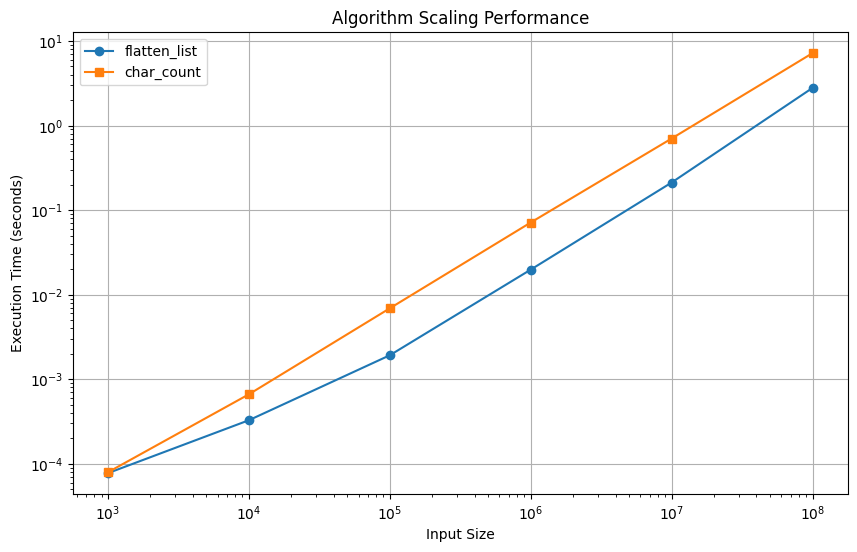

In [7]:
# Experiment settings
sizes = [10**3, 10**4, 10**5, 10**6, 10**7, 10**8]

# Run experiments
print("Running flatten_list experiment...")
flatten_times = run_experiment(new_flatten_list, generate_large_list, sizes)

print("\nRunning char_count experiment...")
char_count_times = run_experiment(new_char_count, generate_random_string, sizes)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sizes, flatten_times, marker='o', label='flatten_list')
plt.plot(sizes, char_count_times, marker='s', label='char_count')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Algorithm Scaling Performance')
plt.legend()
plt.grid(True)
plt.show()

## Report for the scaling new functions

It it observed that generally, the time complexity of the new functions is the same as the old functions. We can also see from both images, that using the implemented functions in python will generally quicker than implementing it ourselves, but this difference is in consstant sterms though.
